In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [35]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [36]:
df.shape

(464, 15)

In [37]:
df.info

<bound method DataFrame.info of                  full_name  rating jersey                   team position  \
0             LeBron James      97    #23     Los Angeles Lakers        F   
1            Kawhi Leonard      97     #2   Los Angeles Clippers        F   
2    Giannis Antetokounmpo      96    #34        Milwaukee Bucks      F-G   
3             Kevin Durant      96     #7          Brooklyn Nets        F   
4             James Harden      96    #13        Houston Rockets        G   
..                     ...     ...    ...                    ...      ...   
459             Chris Paul      88     #3  Oklahoma City Thunder        G   
460           Bradley Beal      88     #3     Washington Wizards        G   
461            Rudy Gobert      87    #27              Utah Jazz        C   
462             Kyle Lowry      87     #7        Toronto Raptors        G   
463     Kristaps Porzingis      87     #6       Dallas Mavericks      F-C   

        b_day       height                w

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum().sum()

0

In [40]:
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis=1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [41]:
def removeHash(value) :
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removeHash)

In [42]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [43]:
df['salary'] = df['salary'].apply(removeHash)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [44]:
df['country'].value_counts()

country
USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [45]:
##Creating Others category for conutries excluding USA, Canada and Australia

def removeCountryOutlier(value) :
    if value not in ['USA', 'Canada', 'Australia'] :
        return 'Others'
    else :
        return value
    
df['country'] = df['country'].apply(removeCountryOutlier)
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [46]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [47]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [48]:
df['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [50]:
def removeUndrafted(value) :
    if value == 'Undrafted' :
        return
    else :
        return value

df['draft_round'] = df['draft_round'].apply(removeUndrafted)
df['draft_peak'] = df['draft_peak'].apply(removeUndrafted)

df = df.dropna()

In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['position'] = lb.fit_transform(df['position'])
df['team'] = lb.fit_transform(df['team'])
df['country'] = lb.fit_transform(df['country'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [52]:
df.describe()

,rating,jersey,team,position,salary,country,draft_year
count,317.000000,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,78.337539,13.839117,14.665615,3.362776,1.145762e+07,2.782334,2014.066246
std,6.820688,14.861682,8.431886,1.742326,1.178645e+07,0.589950,3.915891
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.351838e+06,3.000000,2011.000000
50%,77.000000,10.000000,15.000000,3.000000,6.500000e+06,3.000000,2015.000000
75%,82.000000,22.000000,22.000000,5.000000,1.564375e+07,3.000000,2017.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


In [53]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [58]:
diff = y_test - predictions

C:\Users\HP\AppData\Local\Temp\ipykernel_1608\1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

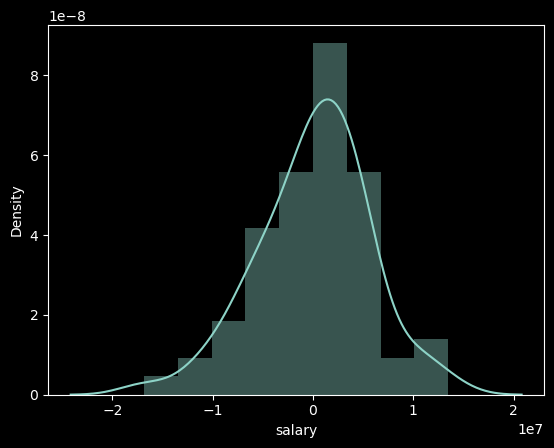

In [59]:
import seaborn as sns
sns.distplot(diff)

In [63]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))